# 가설 검증하기

IOD의 정의가 다음과 같다고 한다
* `서인도양 열대해역(WTIO)의 해면수온이 평년보다 높고 남동인도양 열대해역(SETIO) 해면수온이 평년보다 낮아 서쪽에서 동쪽을 뺀 둘의 차이`
    * 서인도양 50-70˚E, 10˚S-10˚N  
    * 남동인도양 90-110˚E, 10˚S-적도

그러면 SST만으로 iod를 만들 수 있나? 만약 그렇다면 우린 iod를 예측하는 게 아니라 각각의 SST를 예측하는 모델을 만들면 될 것이다.

해당 범위의 SST를 추출하여 평균, 중앙값 등 어떠한 처리를 거쳐 값을 하나로 만들고, 그것의 차이를 iod와 비교해보자.


In [1]:
import netCDF4 as nc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
official_data_path = './official_data/'

In [3]:
raw_iod = nc.Dataset(official_data_path+'iod.nc')
# raw_sst = nc.Dataset(path+'sst.anom.mon.mean.nc')

In [4]:
iod_provided = [i[0][0] for i in raw_iod['iod'][:].data[:]]

### xarray 이용

In [5]:
xr_raw_sst = xr.open_dataset(official_data_path+'sst.anom.mon.mean.nc')

d:\anaconda3\envs\final_sealab\lib\site-packages\xarray\coding\times.py:154: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [6]:
wtio_sst = xr_raw_sst.sel(lat=slice(-10, 10), lon=slice(50, 70)).sst.data
setio_sst = xr_raw_sst.sel(lat=slice(-10, 0), lon=slice(90, 110)).sst.data

In [7]:
print(wtio_sst.shape)
print(setio_sst.shape)

(499, 20, 21)
(499, 10, 21)


In [8]:
print(f'계산될 wtio의 경도 범위: {xr_raw_sst.sel(lat=slice(-10, 10), lon=slice(50, 70)).lon.data}')
print(f'계산될 wtio의 위도 범위: {xr_raw_sst.sel(lat=slice(-10, 10), lon=slice(50, 70)).lat.data}')
print(f'계산될 setio의 경도 범위: {xr_raw_sst.sel(lat=slice(-10, 0), lon=slice(90, 110)).lon.data}')
print(f'계산될 setio의 위도 범위: {xr_raw_sst.sel(lat=slice(-10, 0), lon=slice(90, 110)).lat.data}')

계산될 wtio의 경도 범위: [50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67.
 68. 69. 70.]
계산될 wtio의 위도 범위: [-9.5 -8.5 -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5
  4.5  5.5  6.5  7.5  8.5  9.5]
계산될 setio의 경도 범위: [ 90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103.
 104. 105. 106. 107. 108. 109. 110.]
계산될 setio의 위도 범위: [-9.5 -8.5 -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5]


In [9]:
wtio_stt_mean = [np.nanmean(wtio_sst[i]) for i in range(len(wtio_sst))]
setio_stt_mean = [np.nanmean(setio_sst[i]) for i in range(len(setio_sst))]

iod_calculated = [wtio_stt_mean[i] - setio_stt_mean[i] for i in range(len(wtio_sst))]

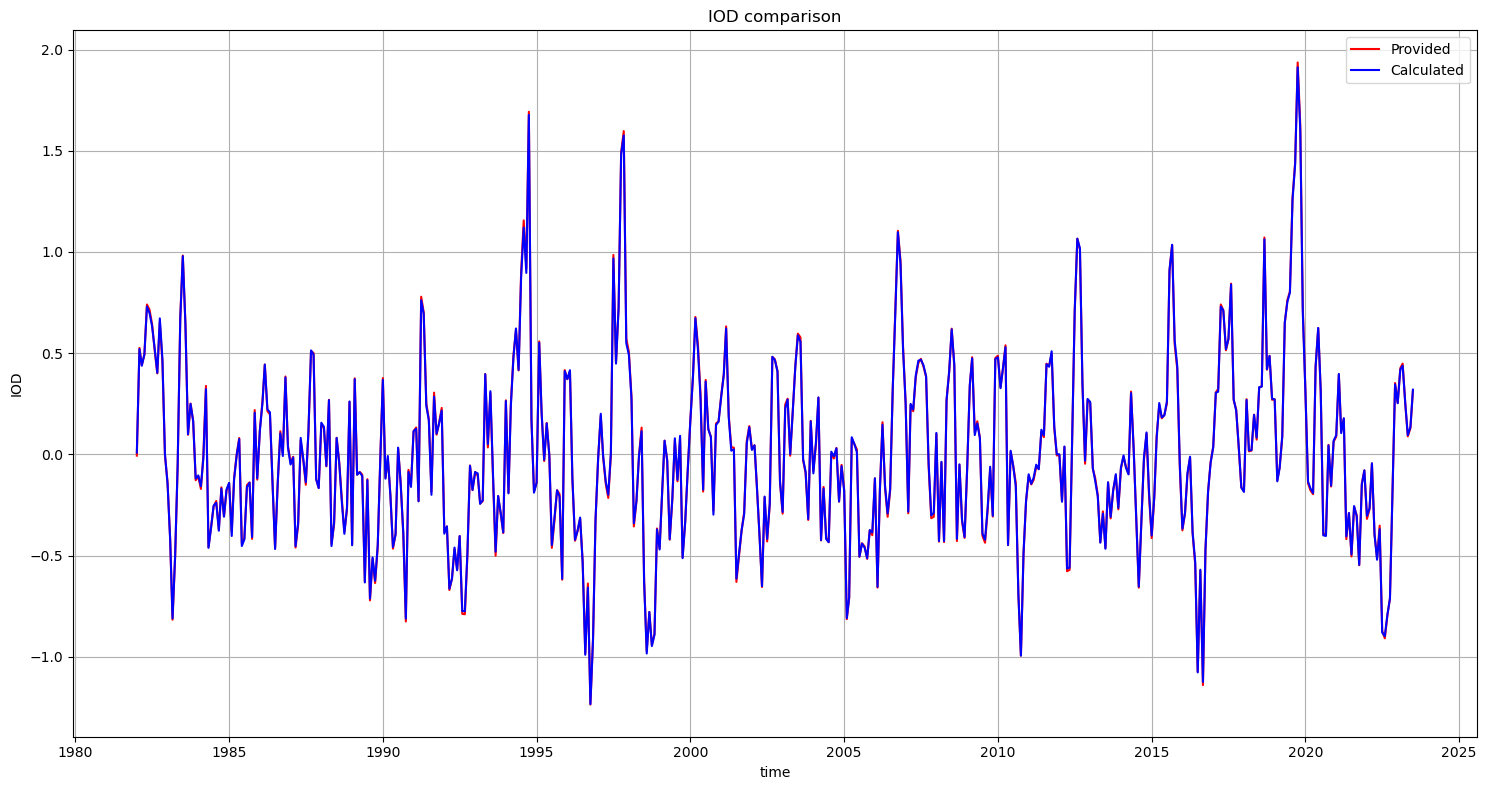

In [10]:
plt.figure(figsize=(15,8))
plt.plot(pd.date_range('1982-01-01', periods=499, freq='MS'), iod_provided, label='Provided', color='red')
plt.plot(pd.date_range('1982-01-01', periods=499, freq='MS'), iod_calculated, label='Calculated', color='blue')
plt.title('IOD comparison')
plt.xlabel('time')
plt.ylabel('IOD')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

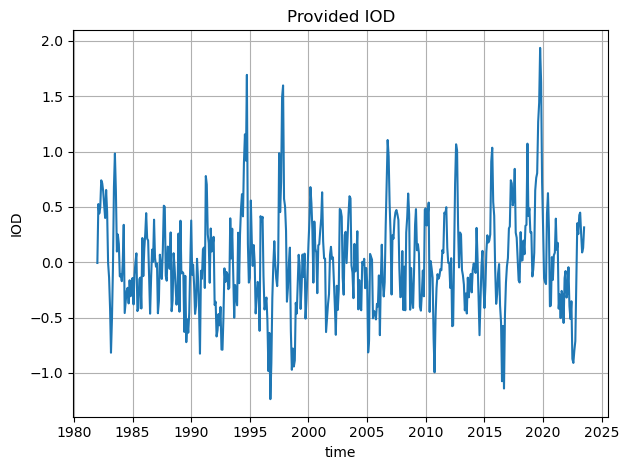

In [11]:
plt.plot(pd.date_range('1982-01-01', periods=499, freq='MS'), iod_provided)
plt.title('Provided IOD')
plt.xlabel('time')
plt.ylabel('IOD')
plt.grid(True)
plt.tight_layout()
plt.show()

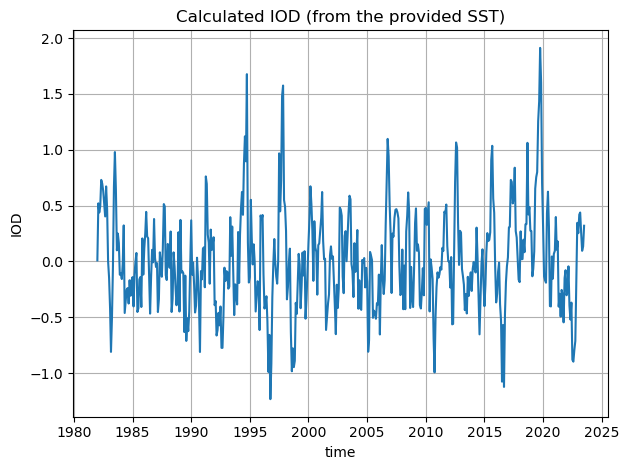

In [12]:
plt.plot(pd.date_range('1982-01-01', periods=499, freq='MS'), iod_calculated)
plt.title('Calculated IOD (from the provided SST)')
plt.xlabel('time')
plt.ylabel('IOD')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\sh\AppData\Local\Temp\ipykernel_11996\1287782823.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


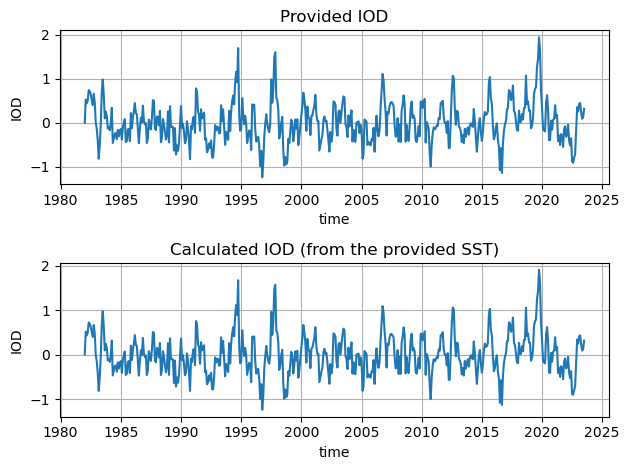

In [13]:
plt.subplot(2,1,1)
plt.plot(pd.date_range('1982-01-01', periods=499, freq='MS'), iod_provided)
plt.title('Provided IOD')
plt.xlabel('time')
plt.ylabel('IOD')
plt.grid(True)
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(pd.date_range('1982-01-01', periods=499, freq='MS'), iod_calculated)
plt.title('Calculated IOD (from the provided SST)')
plt.xlabel('time')
plt.ylabel('IOD')
plt.grid(True)
plt.tight_layout()

plt.show()

In [14]:
print(f'MAE: {mean_absolute_error(iod_provided, iod_calculated)}')
print(f'RMSE: {mean_squared_error(iod_provided, iod_calculated, squared=False)}')

MAE: 0.006998691242188215
RMSE: 0.008913443423807621


# 결론

(WTIO의 SST 평균 - SETIO의 SST 평균)이 주어진 IOD 값과 매우 흡사한 것을 확인했다.

주어진 SST로 계산했을 때 위도가 0.5˚씩 차이가 난다는 것을 감안하면 SST의 평균 차이를 통해 IOD를 구할 수 있다고 볼 수 있다.

즉, SST를 예측하는 모델을 만들면 자연스레 IOD 값을 구할 수 있다.